In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_score,recall_score

from sklearn.feature_selection import SelectFromModel

## Table Of Contents

<ol>
    <li><a href="#objective"><h4>Objective</h4></a></li>
    <li><a href="#why"><h4>Why is Churn Rate Important</h4></a></li>
    <li><a href="#thedata"><h4>The Data</h4></a></li>
    <li><a href="#Summary"><h4>Summary of Numerical Values</h4></a></li>
    <li><a href="#EDA"><h4>Exploratory Data Analysis</h4></a></li>
    <li><a href="#EDA"><h4>Churned Customers</h4></a></li>
     <li><a href="#classification"><h4>Classification</h4></a></li>
    <li><a href="#Decision"><h4>Decision Tree</h4></a></li>
    <li><a href="#ROC"><h4>ROC Curve</h4></a></li>
    <li><a href="#importace"><h4>Importance</h4></a></li>
    <li><a href="#ref"><h4>References</h4></a></li>
    
</ol>
<a id = "objective"></a>

## Objective

<blockquote> 
Use a decision tree model to predict customer churn (the percentage of customers that stopped using a company’s product or service during a certain time frame).
<a id = "why"></a>
<blockquote>

## Why is Churn Rate important

<blockquote>
With subsctiption based businesses, customer retention is important, as it directly affects the profitability, it has a impact on how a business grows, whether customers are moving to nearest competitor. So this will have an influence on whether the business is growing, the rate they are losing or gaining customers is a great focus for businesses.
</blockquote>

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

## The Data
<a id = "thedata"></a>
<blockquote>
We have a Data set of 7043 customers, which consist of 21 rows, including customerID, gender, SeniorCitizen, Partner, Dependents,tenure, PhoneService, MultipleLines, InternetService,OnlineSecurity', OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and the Churn. We want to further investigate as to which of these features affects the rate at which customers churn, the insights gained will attempt to descrease the churn rate and help the business focus on key areas to imporve business processes.
</blockquote>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0)
df['TotalCharges'] = df.TotalCharges.astype(float)


## Summary of Numerical Values
<a id = "Summary"></a>
<blockquote>
<b>Numerical Values -</b> Included within the numerical values were the Tenure,Monthly Charges, Senior Citizenship. In order to investigate the Skewness, which showed that the distribution of Senior Citizens was not symmetrical, the Kurtosis helped us determine whether the distribuiton was very narrow of peaked. 
    <ul>
        <li><b>Senior Citizen-</b> There were no further insights we could gather from the sernior citizen, the Kurtosis and Skewness, showed us that it peaks and not symmetrical, thus we have decided to treat it as a artificat.</li>
        <li><b>Tenure-</b> The tenure is measured in months, the longest subscription is 72 months, with the minimum being 0. On Average the subscription is 32months, a pointto investigate would be at which month is the average likely to churn.</li>
        <li><b>MonthlyCharges- </b> Looking further into the monthly charges, the highest subscriber pays \$188.75, the lowest being $18.25, the lowest has a hight possibility they are using only phone services.</li>
        <li><b>Total Charges -</b> The total chages is a accumulation of how much each customer is paying, the maximum could be that the person with the longest subsctription and highest monthly charges, we can no deduce much at this stage. </li>
    
    
</blockquote>

In [7]:
data_summary = df.describe()
data_summary.loc['skewness'] = df.skew()
data_summary.loc['kurtosis'] = df.kurtosis()
data_summary

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000
skewness,1.833633,0.239540,-0.220524,0.963235
kurtosis,1.362596,-1.387372,-1.257260,-0.228580


In [8]:
df.astype({'TotalCharges': 'float64'}).dtypes
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0)

<h1>Exploratory Data Analysis</h1>
<a id = "EDA"></a>

### Churned Customers

<blockquote>
Out of the 7043 Customers, there were 1869 customers who churned, this is a loss of over 26% of the customer base.
</blockquote>



No     5174
Yes    1869
Name: Churn, dtype: int64


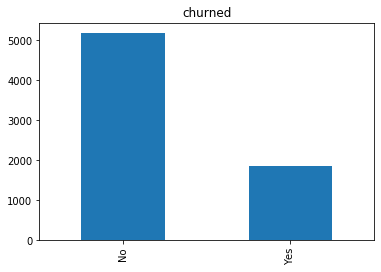

In [9]:
df.Churn.value_counts().plot('bar').set_title('churned')
print(df.Churn.value_counts())

## Numerical Values vs Churn

In [10]:
data = pd.get_dummies(df, columns=['Churn'])

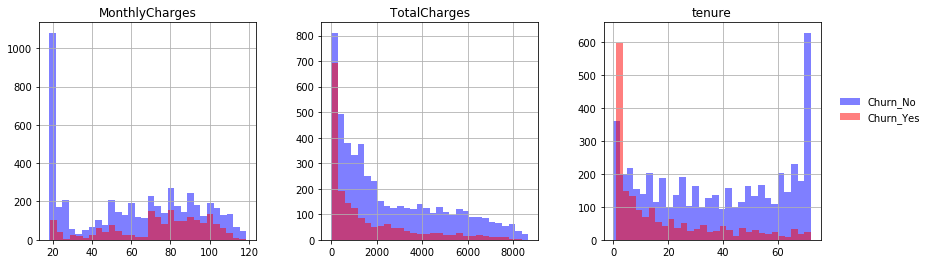

In [11]:
series = ['tenure', 'MonthlyCharges','TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][series].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][series].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(labels =['Churn_No', 'Churn_Yes'], frameon=False, bbox_to_anchor=(1.5,0.7))
plt.show()

### Visualizing the numerical values

<blockquote>
<b>Numerical Values -</b> Included within the numerical values we wanted to visualize were the Tenure,Monthly Charges and Totalcharges: 
    <ul>
        <li><b>Tenure-</b>People were likely to churn in the beginning of their subscription, this could be because the company has a  30 day free  trial, or they clients were not happy with the tterms and conditions that were previously offered. </li>
        <li><b>MonthlyCharges- </b> From the graph, we examined the monthlycharges, people were likely to churn at the median, the affect was no consistent, there is hardly a pattern or major influence made by the monthlycharges.</li>
        <li><b>Total Charges -</b>Seing that most subscirbers churned in the first month, the chacne of the total charges being 0 are high, this adds on to the fact that maybe there is a 30 day free trial, which people are allowed to access certain services cost free.</li>
    
    
</blockquote>

## Outliers

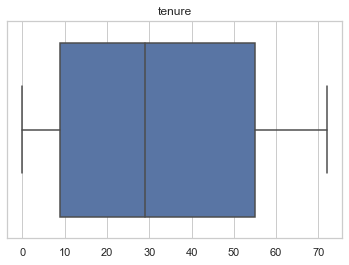

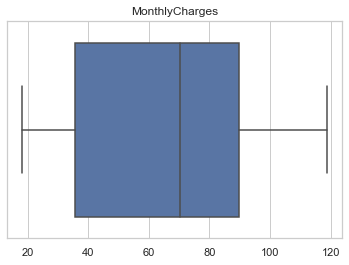

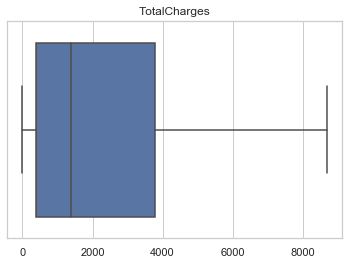

In [12]:
for i in series:
    sns.set(style="whitegrid")
    ax = sns.boxplot(data= data, x=[i])
    plt.title(i)
    plt.show()

### Checking for Outliers
<blockquote>
<b>Numerical Values -</b> Taking a closer look at the Monthly charges, TotalCharges and Tenure, there are no outliers that might affect our data for predcition analysis.
    </blockquote>

## Visualizing the catergorical Values

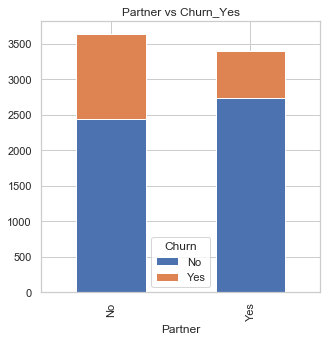

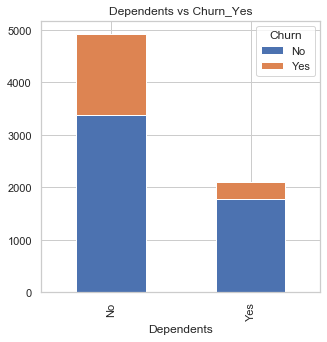

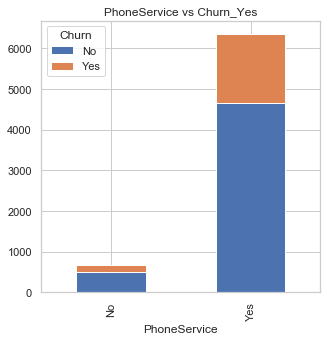

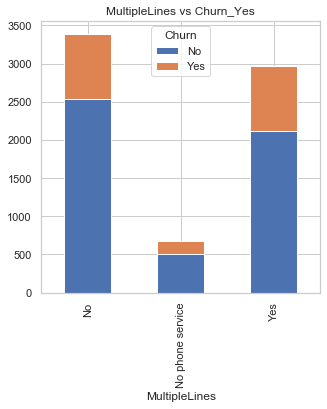

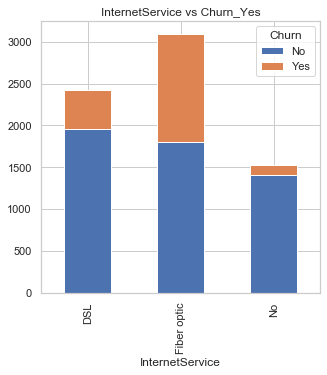

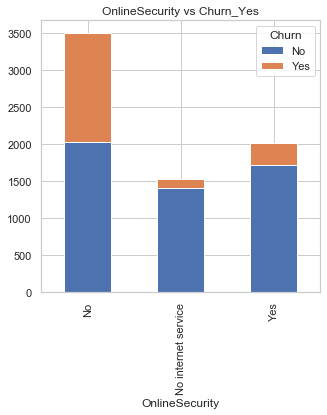

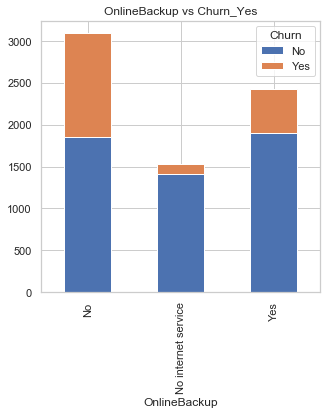

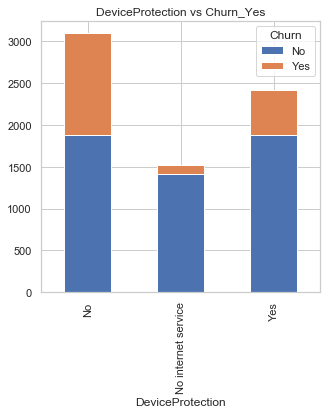

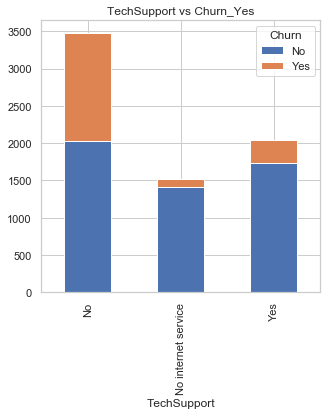

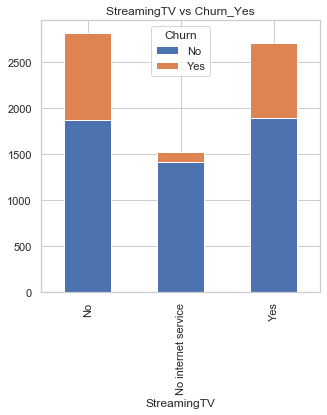

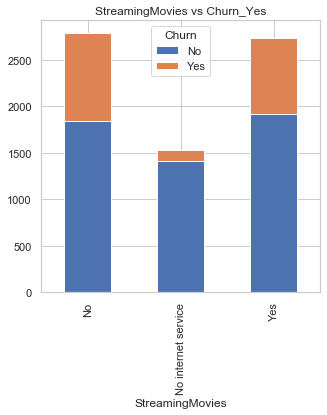

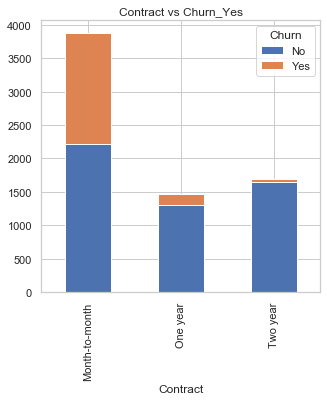

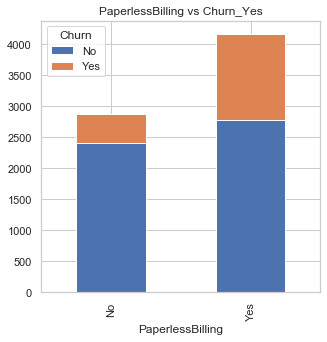

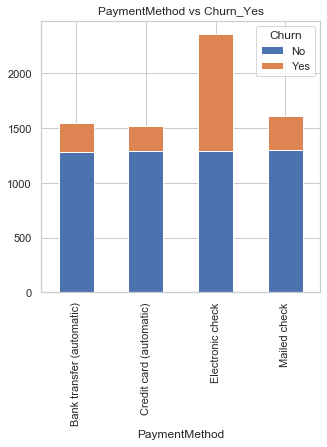

In [13]:
lst = ['Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for i in lst:
    df.groupby([i, "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
    plt.title('{} vs Churn_Yes'.format(i))
    plt.show()

# Categorical Interpretation
<blockquote>
<b>Categorical -</b> Included within the numerical values we wanted to visualize were the Tenure,Monthly Charges and Totalcharges: 
    <ul>
        <li><b>Partner- </b>Looking at the Partners versus the churn, Customers with no partners were most likely to churn. </li>
        <li><b>Dependents-</b>Likewise with customers with no dependent were like to churn, althouth the average was similar, there were more people with no dependatns in the data collected.</li>
        <li><b>PhoneService-</b>There were a few people with no phone services, its more likely that the customers with phone service were to churn. </li>
        <li><b>MultipleLines-</b>The portion of customers who churned were the same for customers with multiple lines and those who did not. </li>
        <li><b>InternetService-</b> Cusotmers with Fibre optic we most likely to churn, followed by those who has DSL. This could be influenced by the prices.</li>
        <li><b>OnlineSecurity-</b> Customers who had no online Security were msot likely to churn, this could be because they are not worried about having to cancel multiple services.</li>
        <li><b>OnlineBackup-</b> People with no online backup were likely to churn, the reason could be that people with online backup would have found it convenient to keep the service, thus not churning.</li>
        <li><b>DeviceProtection-</b>People who have no DeviceProtection were likly to churn, this could be that customers with mulitple services are likely to stay on board.</li>
        <li><b>TechSupport-</b> Customers with no Tech Support were most likely to churn.</li>
        <li><b>StreamingTV-</b>The number of people who churned were similar for both those with and without streaming services.</li>
        <li><b>StreamingMovies-</b>The number of people who churned were similar for both those with and without streaming services.</li>
        <li><b>Contract-</b> Customers with contracts that were more than month month were likley to no churn, Customers with monh-to-month contracts were most likely to churn, they are not binded by any </li>
        <li><b>PaperlessBilling-</b>The customers with paperless billing were most likely to churn.</li>
        <li><b>PaymentMethod-</b> People with Electronic check payment methods were most likely to churn</li>

</blockquote>
  

# Dummying Variables

In [14]:
dummying = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                       'PaymentMethod','Contract', 'PaperlessBilling','Churn']
new_data = pd.get_dummies(df, columns=dummying)

In [15]:
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,DeviceProtection,TechSupport,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,No,...,0,1,0,1,0,0,0,1,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,0,0,1,0,1,0,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,No,No,...,0,0,1,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,0,1,0,1,0,0,0,1,0,1


## Models

<blockqoute>
    <li><b>Model 1 - </b>For The first model, we used all the features, ran the model to find the accuracy, viewed the decision tree, this model performed well, Since a Decison Tree overfits, we found that the depth we had to use to recieve our first entropy of 0, was 7, amking the tree have a lot of branches and nodes. We used this as the base model</li>  <br>
    <li><b>Model 2 - </b>The second model performed much better on accuray, it used  less features. Excluded artifacts such as Senior Citizen, Gender, Partners. </li><br>
     <li><b>Model 3 - </b>With the third and final Model, we did feautre selection to prune the model, we then used the top 8 features which had the most importance. </li>
</blockquote>

In [16]:
exclude = ['customerID', 'gender', 'Partner', 'Dependents','SeniorCitizen',
           'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
           'Churn_No','Churn_Yes','MultipleLines','PhoneService','PaperlessBilling_Yes',
           'PaperlessBilling_No','InternetService_DSL','PaymentMethod_Mailed check',
           'InternetService_No','PaymentMethod_Credit card (automatic)',
           'PaymentMethod_Bank transfer (automatic)','OnlineBackup_Yes',
           'OnlineBackup_No internet service','OnlineSecurity_No internet service',
           'OnlineSecurity_Yes','OnlineBackup_No','Contract_One year']

In [17]:
X = new_data.drop(exclude, axis=1)
y = new_data.iloc[:, -1:]


## Split the Data

<blockquote>We used a split of 80/20 for all 3 models </blockquote>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Instantiate the Model
<blockquote>A decision tree classifier was used, the criterion being entropy level, the max depth that was recommended upon experimentaion was 4. Since the Churn Rate was binary, it was either the customer churns or not, the classifier was chosen over the regressor. 
 </blockquote>

In [19]:
dt = DecisionTreeClassifier(max_depth=5,random_state = 1, criterion='entropy')

## Fit the Model
<blockquote>
The criteria used was entropy, this was used to find the highest information gain. 
</blockquote>

In [20]:
clf = dt.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Predict the Y

In [21]:
y_pred = dt.predict(X_test)

## Mean Squared Error 

In [22]:
mse_dt = MSE(y_test, y_pred)
mse_dt

0.20298083747338538

<blockquote>
The mean square error is used to decide how the nodes are split, our error is really close to 0. For each subset the MSE will be calculated seperately.
</blockquote>

## Classification Report
<a id = "classification"></a>

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1061
           1       0.58      0.62      0.60       348

    accuracy                           0.80      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.80      0.80      0.80      1409



### Accuracy

In [24]:
score = accuracy_score(y_test, y_pred) 
print('The Score is %6.4f. ' % accuracy_score(y_test, y_pred))

The Score is 0.7970


<blockquote>
Our model has a accuray of 79.7%, we are able to make predictions that are almost 80 percent accurate, this is the numbe of true predictions divided by the total number.
</blockquote>

In [25]:
print('The accuracy on training set is %6.4f' % clf.score(X_train,y_train))
print('The accuracy on testing set is %6.4f' %clf.score(X_test, y_test))

The accuracy on training set is 0.7987
The accuracy on testing set is 0.7970


### Precision

In [26]:
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.5833333333333334


<blockquote>
The precision is the ability of our classifier to not label a customer that did not churn as a churned customer. The accuarcy for the precision is 58 percent, meaning that about 40percent of the customers could be labelled wrong, this value decreased when the accuracy increased, meaning that with more data we use to test the model, the better our accuracy for our model becomes, although the precision will decrease.
</blockquote>

### Recall

In [27]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.6235632183908046


<blockquote>
The recall is the sum of the true positive and false negatives, we try to test the ability of our model to find all the positve instances, in this case whether a client did churn. Our model is able to classify with a recall of 62 percent
</blockquote>

### Confusion Matrix

In [28]:
positve, negative= confusion_matrix(y_test, y_pred)
tp, fp = positve 
fn, tn = negative

In [29]:
array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array,columns=['True','False'],index=['Positive','Negative'])
df_cm

,True,False
Positive,906,155
Negative,131,217


<blockquote>From our confusion matrix we are able to observe that there are 1435 True Positves, 150 False positives, 264 False Negatives, 264 True negatives. Our model has properly classified a majority of  our cases. 
</blockquote>

In [30]:
import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

## Decision Tree 
<a id = "Decision"></a>

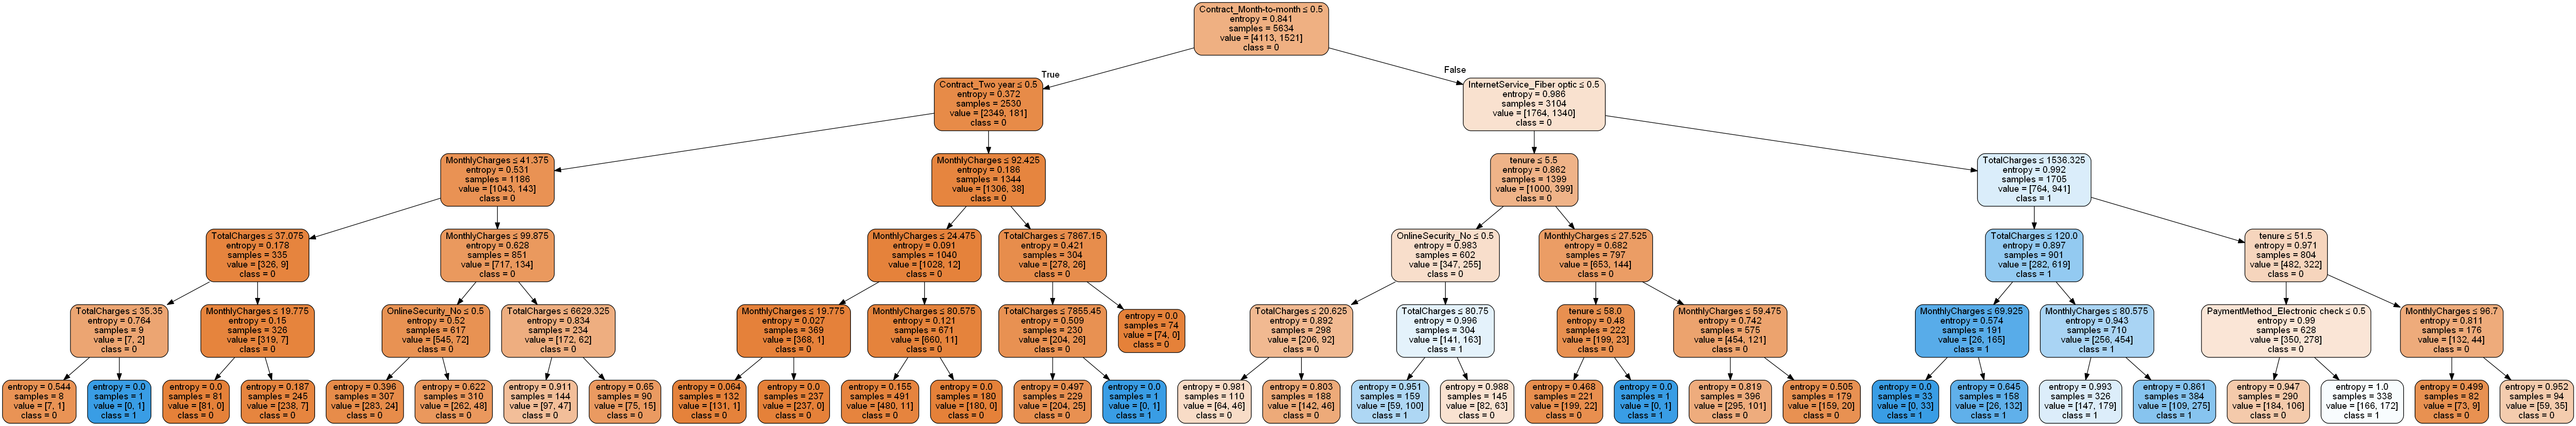

In [36]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churnes.png')
Image(graph.create_png())

## ROC Curve
<a id = "ROC"></a>

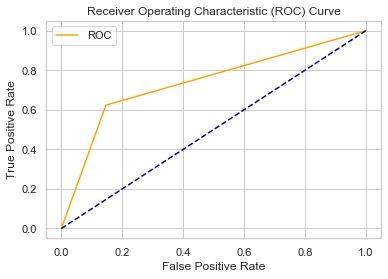

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [33]:
model = SelectFromModel(dt, prefit=True)
X_new = model.transform(X)
X_new.shape

(7043, 1)

## Feature Importace
<a id = "importace"></a>

In [34]:
dict = {'feature': X.columns, 'feature_importance':dt.feature_importances_}
new_df = pd.DataFrame(dict)
new_df.sort_values('feature_importance',axis=0,ascending=False,inplace=True)
features = [x for x in new_df['feature']]
new_df

,feature,feature_importance
6,Contract_Month-to-month,0.520804
2,TotalCharges,0.122186
3,InternetService_Fiber optic,0.115570
1,MonthlyCharges,0.106685
0,tenure,0.064132
7,Contract_Two year,0.043018
4,OnlineSecurity_No,0.020953
5,PaymentMethod_Electronic check,0.006653


## Refernces
<a id = "ref"></a>

<blockquote>
Drakos, G. (2019). Decision Tree Regressor explained in depth. [online] GDCoder. Available at: https://gdcoder.com/decision-tree-regressor-explained-in-depth/ [Accessed 14 Jan. 2020].
    <br><br>
Brid, R. (2018). Decision Trees — A simple way to visualize a decision. [online] Medium. Available at: https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb [Accessed 14 Jan. 2020].
    <br><br>
Maklin, C. (2019). Decision Tree In Python. [online] Medium. Available at: https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93 [Accessed 14 Jan. 2020].
    
    <br><br>
    
    Navlani, A. (2018). Decision Tree Classification in Python. [online] DataCamp Community. Available at: https://www.datacamp.com/community/tutorials/decision-tree-classification-python [Accessed 14 Jan. 2020].
    
    <br><br>
    Brownlee, J. (2016). How To Implement The Decision Tree Algorithm From Scratch In Python. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/ [Accessed 14 Jan. 2020].
</blockquote>